# 301 State Study

In this notebook, we will be analyzing state profiles containing business performance metrics. We're not seeking to identify trends in general but more to detail qualities of different states.

## RQ2 side study


### input;
'stateProfiles.pkl'

In [1]:
import os
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 14

In [3]:
STATEdf = pd.read_pickle('../../data/analysis/stateProfiles.pkl')

In [4]:
STATEdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 9 to 52
Data columns (total 16 columns):
state                12 non-null object
num_businesses       12 non-null int64
num_open             12 non-null int64
%closed              12 non-null float64
num_interactions     12 non-null float64
num_reviews          12 non-null float64
num_checkins         12 non-null float64
num_tips             12 non-null float64
open_rating          12 non-null float64
closed_rating        12 non-null float64
std.dev_rating       12 non-null float64
open_categories      12 non-null object
closed_categories    12 non-null object
chains               12 non-null object
num_chains           12 non-null int64
%chains              12 non-null float64
dtypes: float64(9), int64(3), object(4)
memory usage: 1.6+ KB


## Overview of State Profiles
<p>Below is the distribution of average star ratings of open businesses across the various States.</p>

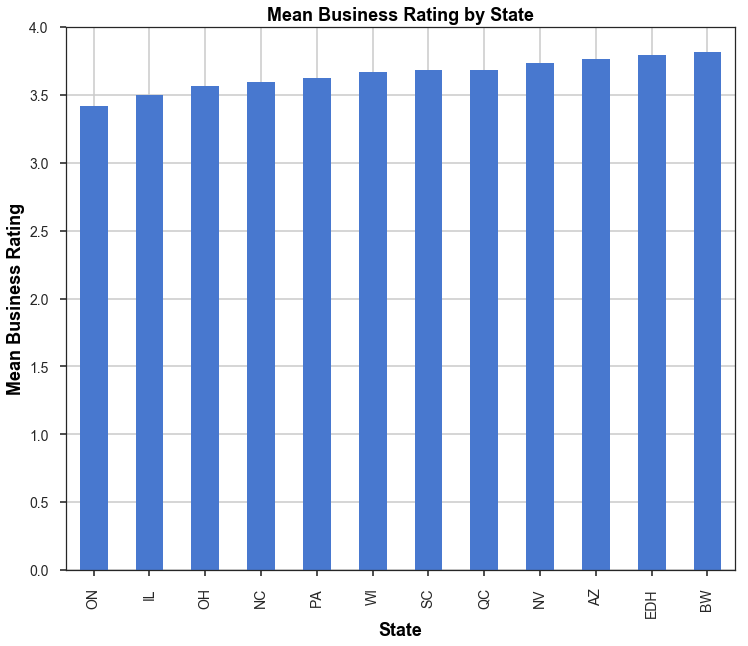

In [5]:
plot = STATEdf.sort_values('open_rating').plot(kind = 'bar', y = 'open_rating', x = 'state',figsize = (12,10), legend = False)
plot.set_title("Mean Business Rating by State")
plot.set_xlabel("State")
plot.set_ylabel("Mean Business Rating")

Here are the number of businesses in each of the states we are analysing

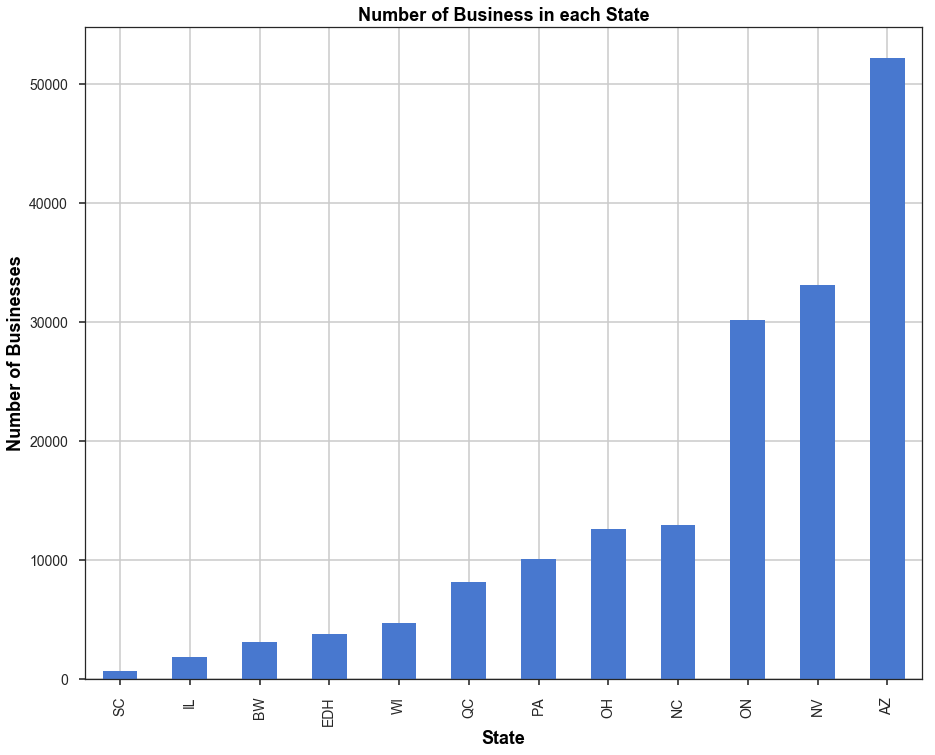

In [6]:
plot =STATEdf.sort_values('num_businesses').plot(kind = 'bar', x = 'state',y = 'num_businesses',figsize = (15,12), legend = False)
plot.set_title("Number of Business in each State")
plot.set_xlabel("State")
plot.set_ylabel("Number of Businesses")

<p>Here is the distribution of the standard deviation of star ratings in each area.</p>
<p>We can see that the standard deviation of ratings for most places is roughly one star, notably all of the US states are on the right with higher standard deviation. While the 4 states on the left are Edinburgh (Scotland), Baden-Württemberg (Germany), Quebec and Ontario (Canada).</p>
<p>It's interesting that in these non-US areas, businesses are rated more similarly. Could this be a product of businesses being of consistent quality? Or are reviewers less discerning?

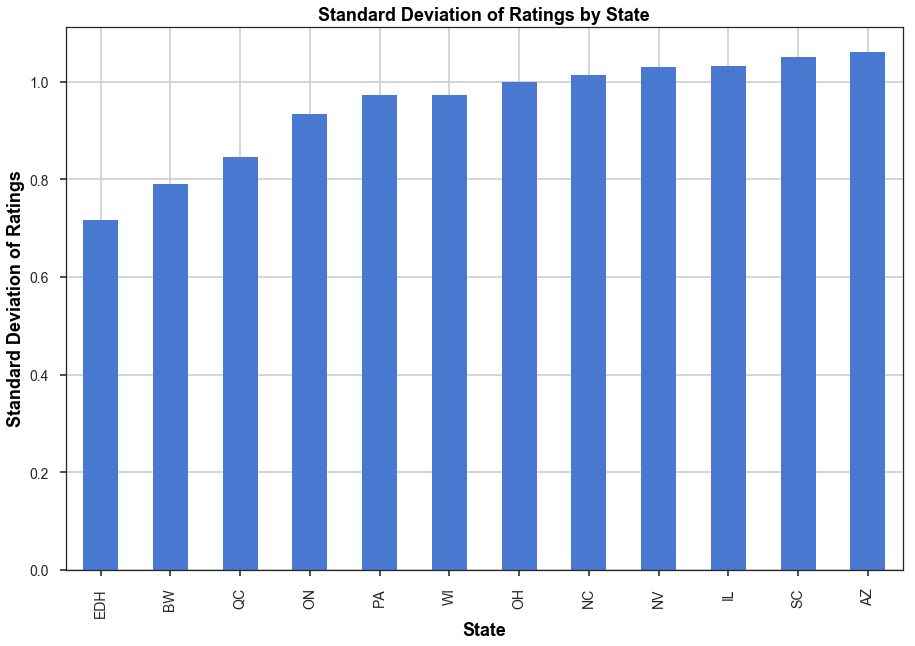

In [7]:
plot = STATEdf.sort_values('std.dev_rating').plot(kind = 'bar', x = 'state',y = 'std.dev_rating',figsize = (15,10), legend = False)
plot.set_title("Standard Deviation of Ratings by State")
plot.set_xlabel("State")
plot.set_ylabel("Standard Deviation of Ratings")

<p>Below the standard deviation of star ratings is plotted against the open stars of each state</p>
<p>Illinois (IL) and Edinburgh (EDH) are the most notable areas, Illinois has the 2nd lowest mean rating, while also having relatively inconsistently rated businesses (High Std. Dev. of Rating) Edinburgh has the lowest standard deviation of rating, so businesses there are more similarly rated, and it maintains quite a high mean rating.</p>
<p>Ontario (ON) is another interesting area. In our ZIP Profile study, we saw that lower mean ratings tends to be associated with higher levels of Standard Deviation of Rating. However, Ontario somewhat bucks this trend when compared to the other states in the graph below. Especially due to the number of businesses in Ontario, it's interesting that it doesn't conform with the overall trend.</p>

https://stackoverflow.com/questions/36538768/legend-showing-categorys-colors-on-pandas-scatter-plot : How to colour by category

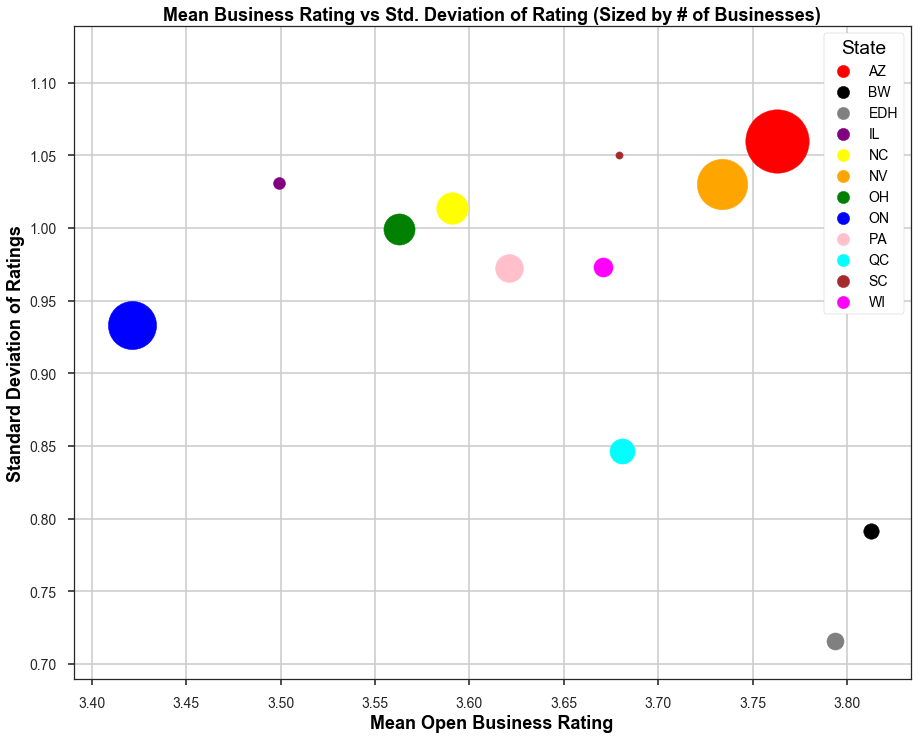

In [8]:
colorDict = {'AZ':'red','NV':'orange','NC':'yellow','SC':'brown','OH':'green',\
            'PA':'pink','QC':'cyan','ON':'blue','WI':'magenta','EDH':'grey',\
            'BW':'black','IL':'purple'}
fig, ax = plt.subplots()
#colours by the defined state in the dictionary, otherwise defaults to black

for state,group in STATEdf.groupby('state'):
    group.plot.scatter(figsize = (14,10),ax=ax, x='open_rating', y='std.dev_rating',\
                       label=state, color = colorDict[state], s = group['num_businesses']/13)

    
    
    # Legend for State colours
lgd = ax.legend(loc=0, frameon=True, framealpha=1, title="State")
for handle in lgd.legendHandles:
    handle.set_sizes([150])
    
ax.set_title("Mean Business Rating vs Std. Deviation of Rating (Sized by # of Businesses)")
ax.set_xlabel("Mean Open Business Rating")
ax.set_ylabel("Standard Deviation of Ratings")
fig.set_size_inches(15,12)

Below we can see the Mean Yelp Interactions for businesses in a given area, plotted against the number of businesses in each area. We can see a general positive correlation between the two. More heavily business populated areas receieve more Yelp interactions per busienss. <p>Nevada (NV) performs particularly well in terms of interactions (probably expected from the commercial environment you would expect in Las Vegas), while we would expect greater numbers of interactions in Ontario (ON).</p>

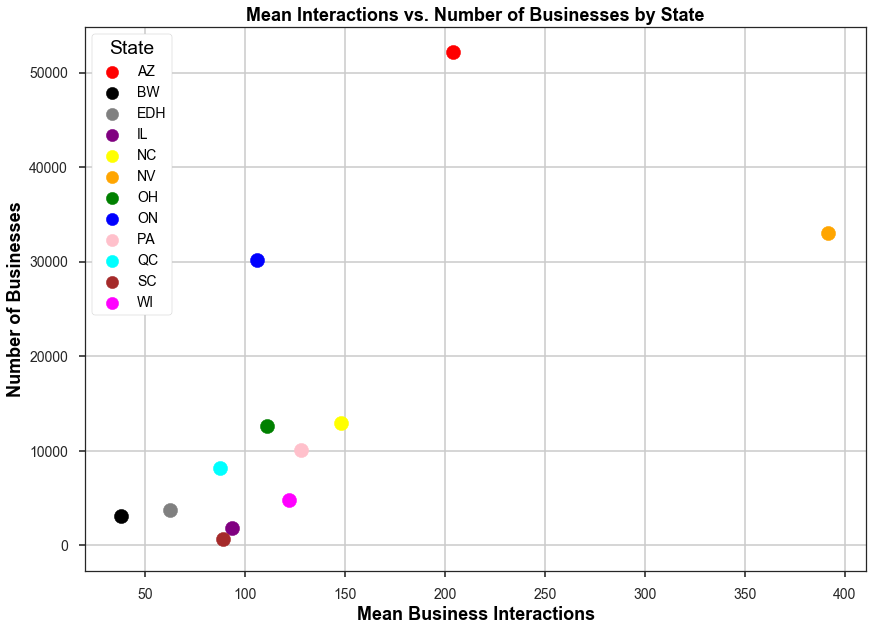

In [9]:
colorDict = {'AZ':'red','NV':'orange','NC':'yellow','SC':'brown','OH':'green',\
            'PA':'pink','QC':'cyan','ON':'blue','WI':'magenta','EDH':'grey',\
            'BW':'black','IL':'purple'}
fig, ax = plt.subplots()

for state,group in STATEdf.groupby('state'):
    group.plot.scatter(figsize = (14,10),ax=ax, x='num_interactions', y='num_businesses',\
                       label=state, color = colorDict[state], s = 200)
    
    # Legend for State colours
lgd = ax.legend(loc=0, frameon=True, framealpha=1, title="State")
for handle in lgd.legendHandles:
    handle.set_sizes([150])
ax.set_title("Mean Interactions vs. Number of Businesses by State")
ax.set_xlabel("Mean Business Interactions")
ax.set_ylabel("Number of Businesses")

Below we compare the Mean Rating of Open Businesses in areas. Surprisingly there are several areas that seem to show a trend of higher ratings being associated with higher levels of closures. Could higher rated areas be more competitive resulting in more closures? Of course there are significant number of outliers to the trend as well.

## Closure Rates

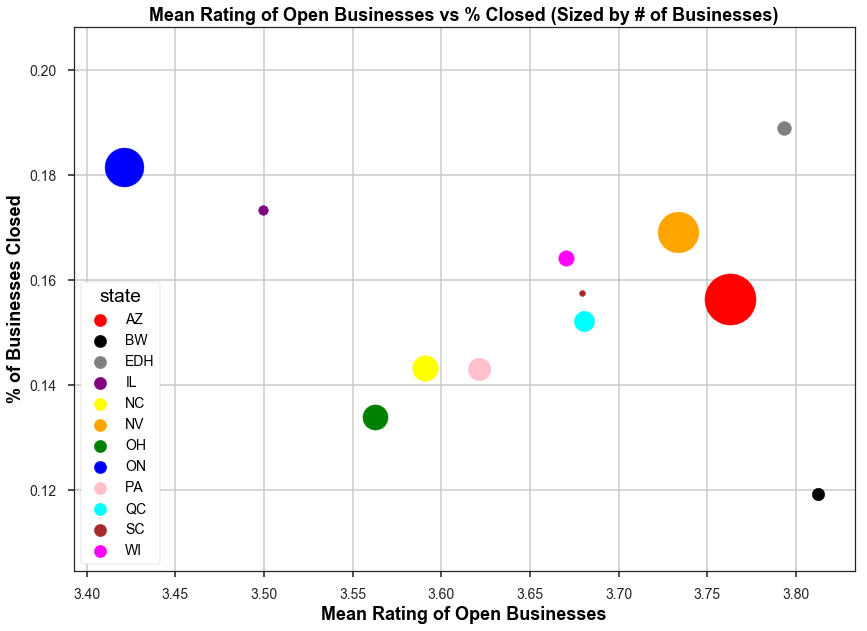

In [10]:
colorDict = {'AZ':'red','NV':'orange','NC':'yellow','SC':'brown','OH':'green',\
            'PA':'pink','QC':'cyan','ON':'blue','WI':'magenta','EDH':'grey',\
            'BW':'black','IL':'purple'}
fig, ax = plt.subplots()
#colours by the defined state in the dictionary, otherwise defaults to black
#STATEdf.plot(kind = 'scatter', y = 'std.dev_rating', x ='open_rating', s = STATEdf.num_businesses/20, figsize = (10,8),\
 #           c = [colorDict.get(c,'black') for c in STATEdf.state], ax = ax)

for state,group in STATEdf.groupby('state'):
    group.plot.scatter(figsize = (14,10),ax=ax, x='open_rating', y='%closed',\
                       label=state, color = colorDict[state], s = group.num_businesses/20)
    
    
# Legend for State colours
lgd = ax.legend( loc= 3,frameon=True, title="state", framealpha = 1)
for handle in lgd.legendHandles:
    handle.set_sizes([150])
    
ax.set_title("Mean Rating of Open Businesses vs % Closed (Sized by # of Businesses)")
ax.set_xlabel("Mean Rating of Open Businesses")
ax.set_ylabel("% of Businesses Closed")

Below, it seems there is less of a relationbetween the Standard Deviation of Ratings and Closures, so how similarly businesses are rated doesn't seem to impact the closure rate.

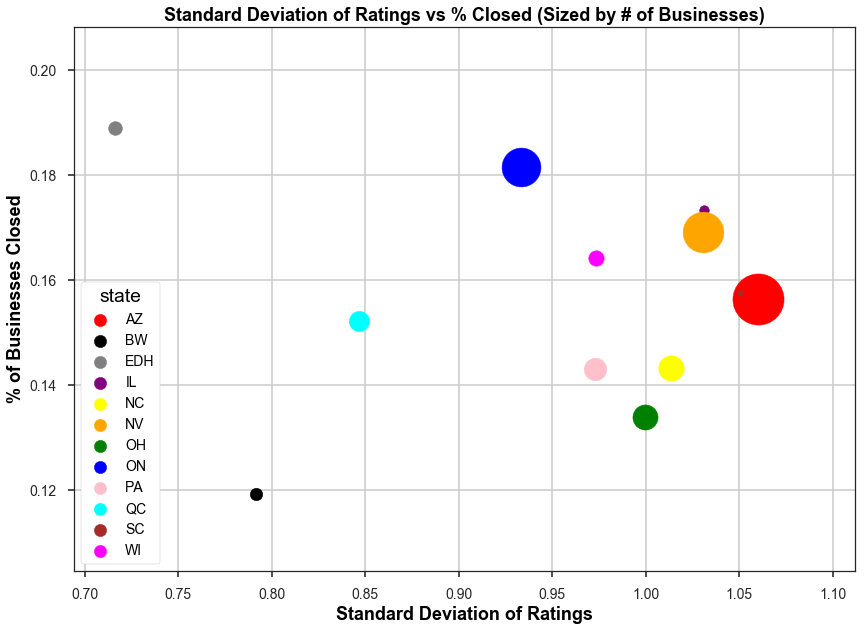

In [11]:
colorDict = {'AZ':'red','NV':'orange','NC':'yellow','SC':'brown','OH':'green',\
            'PA':'pink','QC':'cyan','ON':'blue','WI':'magenta','EDH':'grey',\
            'BW':'black','IL':'purple'}
fig, ax = plt.subplots()

for state,group in STATEdf.groupby('state'):
    group.plot.scatter(figsize = (14,10),ax=ax, x='std.dev_rating', y='%closed',\
                       label=state, color = colorDict[state], s = group.num_businesses/20)
    
    
    # Legend for State colours
lgd = ax.legend( loc= 3,frameon=True, title="state", framealpha = 1)
for handle in lgd.legendHandles:
    handle.set_sizes([150])
    
ax.set_title("Standard Deviation of Ratings vs % Closed (Sized by # of Businesses)")
ax.set_xlabel("Standard Deviation of Ratings")
ax.set_ylabel("% of Businesses Closed")


## Chain Franchises
Below we have the number of chains in each area ordedered by total number of busiensses, this roughly coincides with the number of businesses in each area.

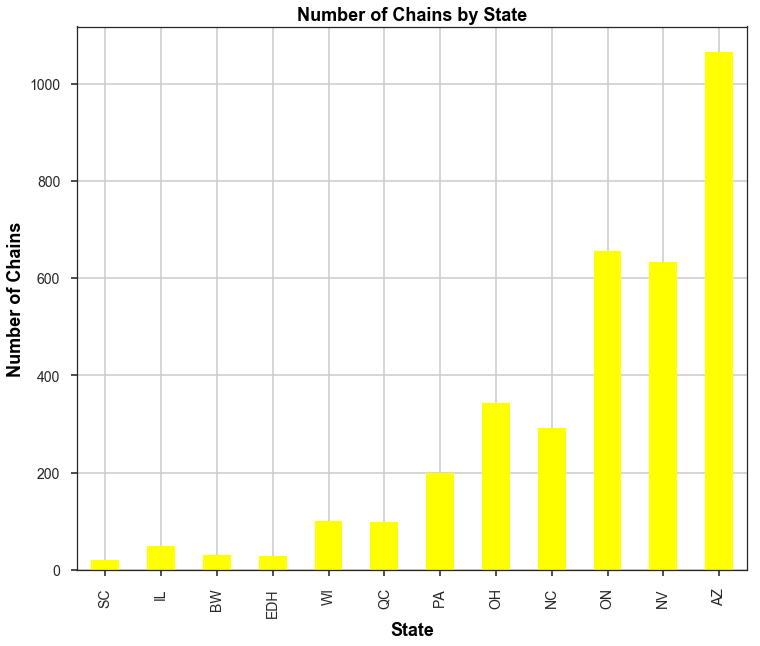

In [12]:
plot = STATEdf.sort_values('num_businesses').plot(kind = 'bar', y = 'num_chains', x = 'state', figsize = (12,10), color = 'yellow',\
                                       legend = False)
plot.set_title("Number of Chains by State")
plot.set_xlabel("State")
plot.set_ylabel("Number of Chains")

What's more interesting to see is which areas have a higher percentage of chains in them, South Carolina (SC), Illinois (IL) and Ohio (OH) seem to be the leaders in % of chains.

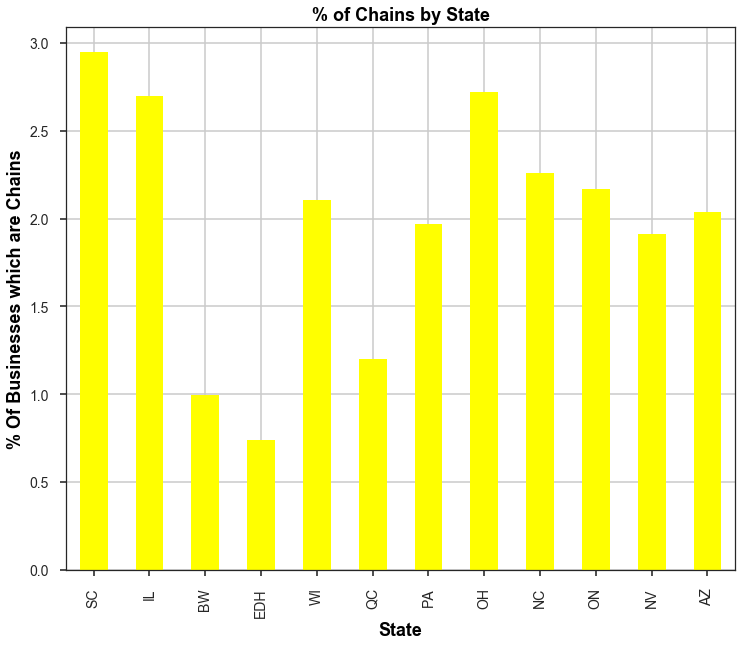

In [13]:
plot = STATEdf.sort_values('num_businesses').plot(kind = 'bar', y = '%chains', x = 'state', figsize = (12,10), color = 'yellow',\
                                      legend = False)
plot.set_title("% of Chains by State")
plot.set_xlabel("State")
plot.set_ylabel("% Of Businesses which are Chains")

Let's take a look at how % of Chains in different States varies with % Closure

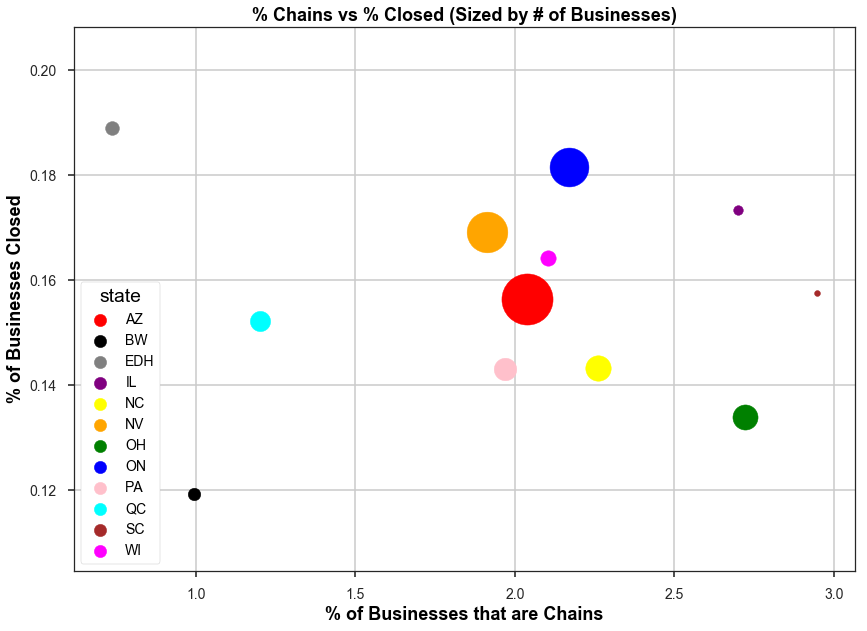

In [15]:
colorDict = {'AZ':'red','NV':'orange','NC':'yellow','SC':'brown','OH':'green',\
            'PA':'pink','QC':'cyan','ON':'blue','WI':'magenta','EDH':'grey',\
            'BW':'black','IL':'purple'}
fig, ax = plt.subplots()

for state,group in STATEdf.groupby('state'):
    group.plot.scatter(figsize = (14,10),ax=ax, x='%chains', y='%closed',\
                       label=state, color = colorDict[state], s = group.num_businesses/20)
    
    
    # Legend for State colours
lgd = ax.legend( loc= 3,frameon=True, title="state", framealpha = 1)
for handle in lgd.legendHandles:
    handle.set_sizes([150])
    
ax.set_title("% Chains vs % Closed (Sized by # of Businesses)")
ax.set_xlabel("% of Businesses that are Chains")
ax.set_ylabel("% of Businesses Closed")

No clear relation between these two metrics. Once again, we see a seperation between the US States and EDH,BW, and QC which are in Scotland,Germany and Canada. Ontario (ON) falls closer to US states on this graph.